In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
path = './new_extracted_data'
files = [f for f in listdir(path) if isfile(join(path, f))]
files

['Rennet Coagulation time (R).csv',
 'Newly synthesised fatty acids.csv',
 'Fat.csv',
 'Total unsaturated Fatty Acid (UFA).csv',
 'Electrical conductivity.csv',
 'Stearic Acid (C18_0).csv',
 'Somatic Cells Count (SCC).csv',
 'Preformed Fatty Acids.csv',
 'Saturated Fatty acid (SFA).csv',
 'Lactose.csv',
 'Mixed Fatty Acids.csv',
 'Casein.csv',
 'Freezing Point.csv',
 'Î²-hydroxybutyrate (BHBA).csv',
 'Vaccenic acid (C18_1).csv',
 'Pregnancy Diagnosis.csv',
 'PH.csv',
 'Somatic Cells Index.csv',
 'Protein.csv',
 'Acetone.csv',
 'Urea.csv',
 'Time to curd firmness (A30).csv',
 'Time to curd firmness (K20).csv',
 'Calving.csv',
 'Index of dairy attitude (IAC).csv']

In [3]:
whole_list = ['Fat','Lactose','Casein','Protein','Index of dairy attitude (IAC)','Calving','Somatic Cells Count (SCC)','Acetone', 'Î²-hydroxybutyrate (BHBA)']
dfs = []

for file in whole_list:
    df = pd.read_csv('./new_extracted_data/' + file + '.csv')
    # Add prefix to all columns except 'idAnimale'
    df = df.rename(columns={col: f"{file}_{col}" for col in df.columns if col != 'idAnimale'})
    dfs.append(df)
#     display(df)
    
Slaughter_df = pd.read_csv('./cleaned_data/single_record/Slaughter.csv')
carcass_df = Slaughter_df[['idAnimale', 'PesoCarcassa']]
carcass_df.head()

Culling_df = pd.read_csv('./cleaned_data/single_record/Culling.csv')
culling_df = Culling_df[['idAnimale']]
culling_df['In Culling File'] = True
# print(len(culling_df))
culling_df.head()

repro_df = pd.read_csv('animal_df.csv')
repro_df = repro_df[['idAnimale', 'Average Calving Interval']]
repro_df = repro_df.dropna(subset=['Average Calving Interval'])
repro_df = repro_df[repro_df['Average Calving Interval']>0]
repro_df


/var/folders/zv/_4gjbgc57z1gxk8d5dql_0440000gn/T/ipykernel_73382/3681691269.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culling_df['In Culling File'] = True


idAnimale  Average Calving Interval
23    -9223372036847959886                346.000000
63    -9223372036845075984                425.000000
69    -9223372036833541625                355.500000
95    -9223372036847173013                572.000000
151   -9223372036847959290                360.333333
...                    ...                       ...
85821 -9223372036846125292                352.000000
85866 -9223372036846911614                605.000000
85932 -9223372036846125080                406.500000
85938 -9223372036845076494                344.500000
85946 -9223372036846911490                403.000000

[15152 rows x 2 columns]

In [4]:
#drop last column where num_non_positive_records is calculated

for df in dfs:
    df = df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    
dfs[0]

idAnimale  Fat_mean   Fat_std  Fat_count
0     -9223372036845469640  3.844167  0.447706         12
1     -9223372036849401793  3.540476  0.645936         21
2     -9223372036849401792  3.484615  0.410827         13
3     -9223372036849401791  3.960000  0.652457          4
4     -9223372036849401790  4.691667  0.531217         18
...                    ...       ...       ...        ...
21007 -9223372036848615439  3.380000  0.609363         13
21008 -9223372036848615438  2.260937  1.026762         32
21009 -9223372036846911490  4.049091  0.487376         11
21010 -9223372036845469697  4.126154  0.532477         13
21011 -9223372036845469695  3.855263  0.348280         19

[21012 rows x 4 columns]

In [5]:
merged_df = dfs[0]
for i in range(len(dfs)-1):
    merged_df = pd.merge(merged_df, dfs[i+1], on='idAnimale', how='outer')
    
merged_df = pd.merge(merged_df, carcass_df, on='idAnimale', how='outer') 
merged_df = pd.merge(merged_df, culling_df, on='idAnimale', how='outer') 
merged_df = pd.merge(merged_df, repro_df, on='idAnimale', how='outer') 


In [6]:
merged_df

/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


idAnimale  Fat_mean   Fat_std  Fat_count  Lactose_mean  \
0     -9223372036845469640  3.844167  0.447706       12.0      4.889167   
1     -9223372036849401793  3.540476  0.645936       21.0      4.830000   
2     -9223372036849401792  3.484615  0.410827       13.0      4.752308   
3     -9223372036849401791  3.960000  0.652457        4.0      4.750000   
4     -9223372036849401790  4.691667  0.531217       18.0      4.880556   
...                    ...       ...       ...        ...           ...   
26499 -9223372036848963584       NaN       NaN        NaN           NaN   
26500 -9223372036849090560       NaN       NaN        NaN           NaN   
26501 -9223372036850381824       NaN       NaN        NaN           NaN   
26502 -9223372036848634880       NaN       NaN        NaN           NaN   
26503 -9223372036847885312       NaN       NaN        NaN           NaN   

       Lactose_std  Lactose_count  Casein_mean  Casein_std  Casein_count  ...  \
0         0.190546           12.0     2.951667    0.490660          12.0  ...   
1         0.132061           20.0     2.708000    0.187659          20.0  ...   
2         0.101841           13.0     2.687692    0.186678          13.0  ...   
3         0.197864            4.0     2.917500    0.272798           4.0  ...   
4         0.132349           18.0     3.028889    0.236828          18.0  ...   
...            ...            ...          ...         ...           ...  ...   
26499          NaN            NaN          NaN         NaN           NaN  ...   
26500          NaN            NaN          NaN         NaN           NaN  ...   
26501          NaN            NaN          NaN         NaN           NaN  ...   
26502          NaN            NaN          NaN         NaN           NaN  ...   
26503          NaN            NaN          NaN         NaN           NaN  ...   

       Somatic Cells Count (SCC)_count  Acetone_mean  Acetone_std  \
0                                 12.0      0.131250     0.078968   
1                                 19.0      0.120909     0.065707   
2                                 13.0      0.077778     0.034247   
3                                  4.0           NaN          NaN   
4                                 17.0      0.085000     0.069940   
...                                ...           ...          ...   
26499                              NaN           NaN          NaN   
26500                              NaN           NaN          NaN   
26501                              NaN           NaN          NaN   
26502                              NaN           NaN          NaN   
26503                              NaN           NaN          NaN   

       Acetone_count  Î²-hydroxybutyrate (BHBA)_mean  \
0                8.0                        0.100000   
1               11.0                        0.083333   
2                9.0                        0.076667   
3                NaN                             NaN   
4                6.0                        0.055000   
...              ...                             ...   
26499            NaN                             NaN   
26500            NaN                             NaN   
26501            NaN                             NaN   
26502            NaN                             NaN   
26503            NaN                             NaN   

       Î²-hydroxybutyrate (BHBA)_std  Î²-hydroxybutyrate (BHBA)_count  \
0                           0.047697                              8.0   
1                           0.044222                             12.0   
2                           0.045216                              9.0   
3                                NaN                              0.0   
4                           0.034278                              8.0   
...                              ...                              ...   
26499                            NaN                              NaN   
26500                            NaN                     

In [7]:
merged_df['Culled'] = merged_df['PesoCarcassa'].notna() | merged_df['In Culling File'].notna()
merged_df

/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


idAnimale  Fat_mean   Fat_std  Fat_count  Lactose_mean  \
0     -9223372036845469640  3.844167  0.447706       12.0      4.889167   
1     -9223372036849401793  3.540476  0.645936       21.0      4.830000   
2     -9223372036849401792  3.484615  0.410827       13.0      4.752308   
3     -9223372036849401791  3.960000  0.652457        4.0      4.750000   
4     -9223372036849401790  4.691667  0.531217       18.0      4.880556   
...                    ...       ...       ...        ...           ...   
26499 -9223372036848963584       NaN       NaN        NaN           NaN   
26500 -9223372036849090560       NaN       NaN        NaN           NaN   
26501 -9223372036850381824       NaN       NaN        NaN           NaN   
26502 -9223372036848634880       NaN       NaN        NaN           NaN   
26503 -9223372036847885312       NaN       NaN        NaN           NaN   

       Lactose_std  Lactose_count  Casein_mean  Casein_std  Casein_count  ...  \
0         0.190546           12.0     2.951667    0.490660          12.0  ...   
1         0.132061           20.0     2.708000    0.187659          20.0  ...   
2         0.101841           13.0     2.687692    0.186678          13.0  ...   
3         0.197864            4.0     2.917500    0.272798           4.0  ...   
4         0.132349           18.0     3.028889    0.236828          18.0  ...   
...            ...            ...          ...         ...           ...  ...   
26499          NaN            NaN          NaN         NaN           NaN  ...   
26500          NaN            NaN          NaN         NaN           NaN  ...   
26501          NaN            NaN          NaN         NaN           NaN  ...   
26502          NaN            NaN          NaN         NaN           NaN  ...   
26503          NaN            NaN          NaN         NaN           NaN  ...   

       Acetone_mean  Acetone_std  Acetone_count  \
0          0.131250     0.078968            8.0   
1          0.120909     0.065707           11.0   
2          0.077778     0.034247            9.0   
3               NaN          NaN            NaN   
4          0.085000     0.069940            6.0   
...             ...          ...            ...   
26499           NaN          NaN            NaN   
26500           NaN          NaN            NaN   
26501           NaN          NaN            NaN   
26502           NaN          NaN            NaN   
26503           NaN          NaN            NaN   

       Î²-hydroxybutyrate (BHBA)_mean  Î²-hydroxybutyrate (BHBA)_std  \
0                            0.100000                       0.047697   
1                            0.083333                       0.044222   
2                            0.076667                       0.045216   
3                                 NaN                            NaN   
4                            0.055000                       0.034278   
...                               ...                            ...   
26499                             NaN                            NaN   
26500                             NaN                            NaN   
26501                             NaN                            NaN   
26502                             NaN                            NaN   
26503                             NaN                            NaN   

       Î²-hydroxybutyrate (BHBA)_count  PesoCarcassa  In Culling File  \
0                                  8.0           NaN              NaN   
1                                 12.0           NaN              NaN   
2                                  9.0           NaN              NaN   
3                                  0.0           NaN              NaN   
4                                  8.0           NaN              NaN   
...                                ...           ...              ...   
26499                              NaN           NaN             True   
26500                              NaN           NaN             True   
26501   

In [8]:
# Calculate the percentage of NaN values in each column
nan_percentage = merged_df.isnull().mean() * 100
print("Percentage of NaN values in each column:\n", nan_percentage)

Percentage of NaN values in each column:
 idAnimale                               0.000000
Fat_mean                               23.894506
Fat_std                                23.894506
Fat_count                              20.721401
Lactose_mean                           23.751132
Lactose_std                            23.751132
Lactose_count                          20.536523
Casein_mean                            23.739813
Casein_std                             23.739813
Casein_count                           20.551615
Protein_mean                           23.920918
Protein_std                            23.920918
Protein_count                          20.721401
Index of dairy attitude (IAC)_mean     60.945518
Index of dairy attitude (IAC)_std      60.945518
Index of dairy attitude (IAC)_count    58.111983
Calving_num_successful_pregnancy       15.544823
Somatic Cells Count (SCC)_mean         23.932237
Somatic Cells Count (SCC)_std          23.932237
Somatic Cells Count (SCC)_c

In [9]:
# Impute NaNs with column means
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(merged_df.drop(columns=['idAnimale']))

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)


In [10]:

# Initialize and fit K-means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_standardized)

# Add the cluster labels to the original dataframe
merged_df['Cluster'] = clusters


/Users/jiong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/jiong/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


idAnimale  Fat_mean   Fat_std  Fat_count  Lactose_mean  \
0     -9223372036845469640  0.036058  0.447706       12.0      0.699885   
1     -9223372036849401793 -0.702990  0.645936       21.0      0.339906   
2     -9223372036849401792 -0.838930  0.410827       13.0     -0.132786   
3     -9223372036849401791  0.317945  0.652457        4.0     -0.146827   
4     -9223372036849401790  2.098497  0.531217       18.0      0.647494   
...                    ...       ...       ...        ...           ...   
26499 -9223372036848963584       NaN       NaN        NaN           NaN   
26500 -9223372036849090560       NaN       NaN        NaN           NaN   
26501 -9223372036850381824       NaN       NaN        NaN           NaN   
26502 -9223372036848634880       NaN       NaN        NaN           NaN   
26503 -9223372036847885312       NaN       NaN        NaN           NaN   

       Lactose_std  Lactose_count  Casein_mean  Casein_std  Casein_count  ...  \
0         0.190546           12.0     1.080865    0.490660          12.0  ...   
1         0.132061           20.0    -0.053311    0.187659          20.0  ...   
2         0.101841           13.0    -0.147835    0.186678          13.0  ...   
3         0.197864            4.0     0.921833    0.272798           4.0  ...   
4         0.132349           18.0     1.440306    0.236828          18.0  ...   
...            ...            ...          ...         ...           ...  ...   
26499          NaN            NaN          NaN         NaN           NaN  ...   
26500          NaN            NaN          NaN         NaN           NaN  ...   
26501          NaN            NaN          NaN         NaN           NaN  ...   
26502          NaN            NaN          NaN         NaN           NaN  ...   
26503          NaN            NaN          NaN         NaN           NaN  ...   

       Î²-hydroxybutyrate (BHBA)_count  PesoCarcassa  In Culling File  \
0                                  8.0           NaN              NaN   
1                                 12.0           NaN              NaN   
2                                  9.0           NaN              NaN   
3                                  0.0           NaN              NaN   
4                                  8.0           NaN              NaN   
...                                ...           ...              ...   
26499                              NaN           NaN             True   
26500                              NaN           NaN             True   
26501                              NaN           NaN             True   
26502                              NaN           NaN             True   
26503                              NaN           NaN             True   

       Average Calving Interval  Culled  Cluster  Milk_Quality_Score  \
0                           NaN   False        1            0.738781   
1                     -0.422562   False        1            0.229010   
2                     -0.113514   False        1           -0.112195   
3                           NaN   False        1            0.537698   
4                     -0.363130   False        1            1.111040   
...                         ...     ...      ...                 ...   
26499                       NaN    True        1                 NaN   
26500                       NaN    True        1                 NaN   
26501                       NaN    True        1                 NaN   
26502                       NaN    True        1                 NaN   
26503                       NaN    True        1                 NaN   

       Fertility_Score  Disease_Score  Carcass_Score  
0                  NaN      -0.922531            NaN  
1             0.422562      -0.433693            NaN  
2             0.113514      -0.118609            NaN  
3                  NaN      -0.579885            NaN  
4             0.363130      -0.162314            NaN  
...                ...            ...            ...  
26499           

Milk_Quality_Score  Fertility_Score  Disease_Score  Carcass_Score
0                0.738781     4.126700e-16      -0.922531   3.798243e-17
1                0.229010     4.225623e-01      -0.433693   3.798243e-17
2               -0.112195     1.135141e-01      -0.118609   3.798243e-17
3                0.537698     4.126700e-16      -0.579885   3.798243e-17
4                1.111040     3.631299e-01      -0.162314   3.798243e-17
...                   ...              ...            ...            ...
26499           -0.002900     4.126700e-16      -0.006667   3.798243e-17
26500           -0.002900     4.126700e-16      -0.006667   3.798243e-17
26501           -0.002900     4.126700e-16      -0.006667   3.798243e-17
26502           -0.002900     4.126700e-16      -0.006667   3.798243e-17
26503           -0.002900     4.126700e-16      -0.006667   3.798243e-17

[26504 rows x 4 columns]

/Users/jiong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


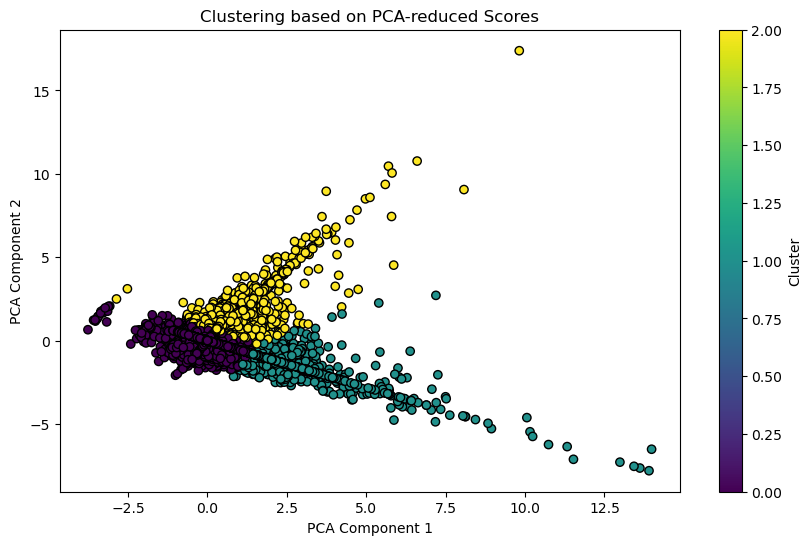

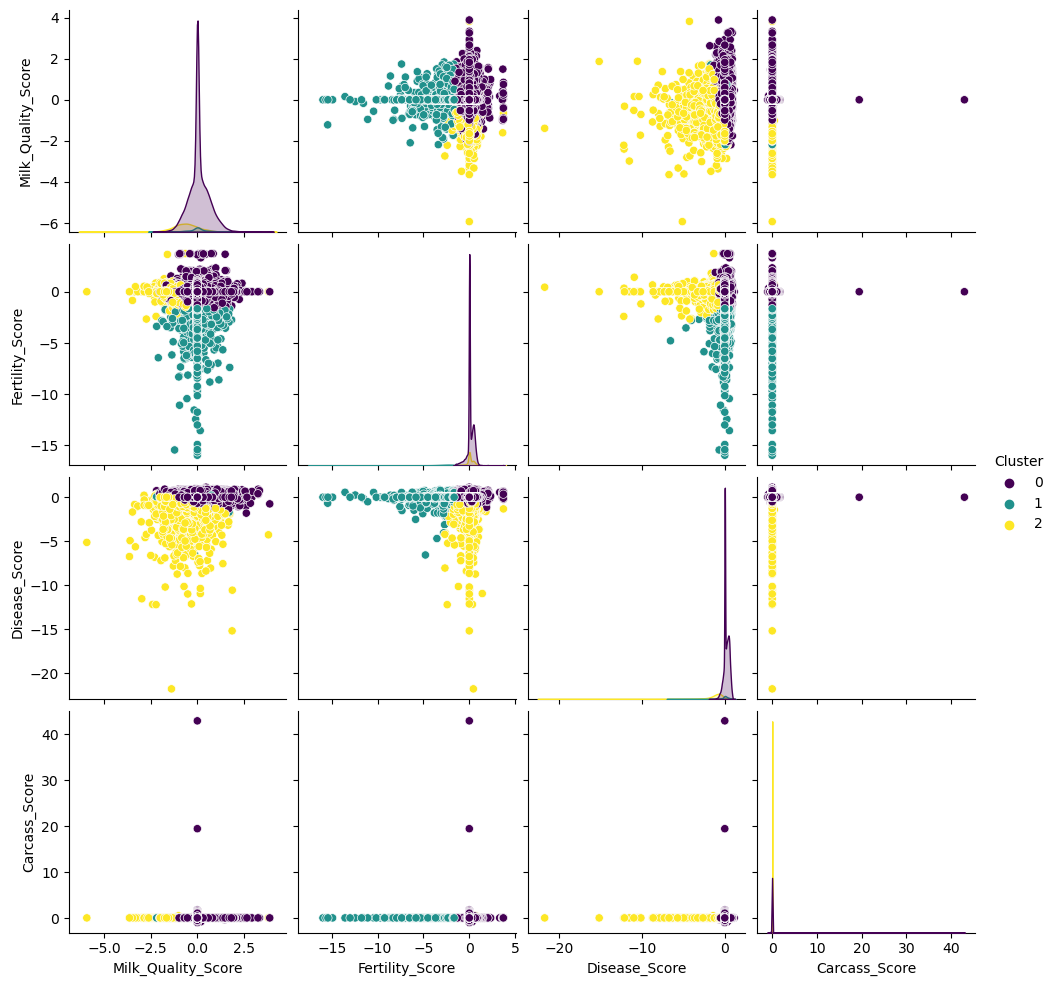

In [11]:
df = merged_df

# Define the columns for each score
milk_quality_columns = ['Fat_mean', 'Lactose_mean', 'Casein_mean', 'Protein_mean', 'Index of dairy attitude (IAC)_mean']
fertility_columns = ['Average Calving Interval']
disease_columns = ['Somatic Cells Count (SCC)_mean', 'Acetone_mean', 'Î²-hydroxybutyrate (BHBA)_mean']
carcass_column = ['PesoCarcassa']

# Step 1: Normalize each trait individually
scaler = StandardScaler()

# Standardize milk quality, fertility, disease, and carcass columns
df[milk_quality_columns] = scaler.fit_transform(df[milk_quality_columns])
df[fertility_columns] = scaler.fit_transform(df[fertility_columns])
df[disease_columns] = scaler.fit_transform(df[disease_columns])
df[carcass_column] = scaler.fit_transform(df[carcass_column])

# Step 2: Calculate composite scores by averaging relevant standardized columns
df['Milk_Quality_Score'] = df[milk_quality_columns].mean(axis=1)
df['Fertility_Score'] = -df[fertility_columns].mean(axis=1) # higher the better
df['Disease_Score'] = -df[disease_columns].mean(axis=1) # higher the better
df['Carcass_Score'] = df[carcass_column].mean(axis=1)
display(df)

# Step 3: Handle missing values by imputing with column mean
df_imputed = df[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score', 'Carcass_Score']].fillna(df.mean())
display(df_imputed)

# Step 4: Use PCA to reduce to two dimensions for better balance
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_imputed)

# Step 5: Perform K-means clustering with k=3 (try other values as well)
kmeans = KMeans(n_clusters=3, random_state=42)
df_imputed['Cluster'] = kmeans.fit_predict(pca_scores)

# Step 6: Visualize clustering results with PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=df_imputed['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Clustering based on PCA-reduced Scores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Pairplot with original scores and cluster labels
sns.pairplot(df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score', 'Carcass_Score', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()


Loadings of each trait on PCA components:
                    PCA Component 1  PCA Component 2
Milk_Quality_Score        -0.180766        -0.424734
Fertility_Score           -0.870608         0.488712
Disease_Score             -0.457564        -0.762078
Carcass_Score              0.000026         0.000105


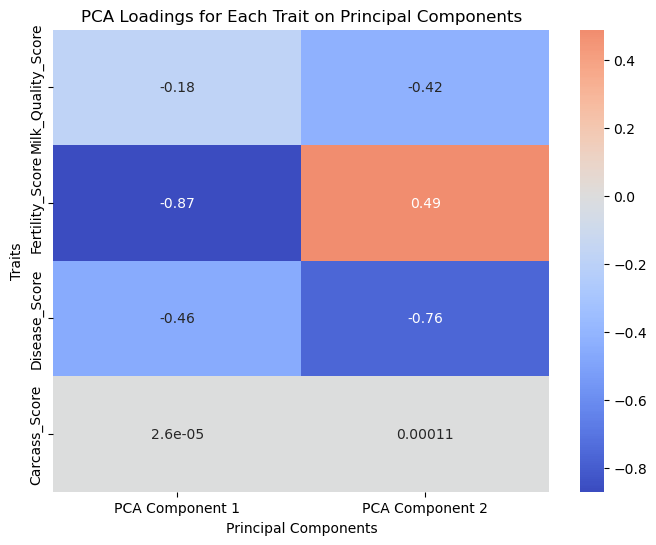

In [12]:
# Assuming df_imputed is the dataframe with the composite scores calculated
composite_scores = df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score', 'Carcass_Score']]

# Perform PCA to get the components
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(composite_scores)

# Get the loadings for each component
loadings = pd.DataFrame(pca.components_.T, index=composite_scores.columns, columns=['PCA Component 1', 'PCA Component 2'])

# Display the loadings to understand what each component represents
print("Loadings of each trait on PCA components:")
print(loadings)

# Plot the loadings for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Loadings for Each Trait on Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Traits")
plt.show()


idAnimale  Milk_Quality_Score  Fertility_Score  Disease_Score
12216 -9223372036848126976           -0.870064         0.396561       0.191403

Milk_Quality_Score  Fertility_Score  Disease_Score
0                0.738781     4.126700e-16      -0.922531
1                0.229010     4.225623e-01      -0.433693
2               -0.112195     1.135141e-01      -0.118609
3                0.537698     4.126700e-16      -0.579885
4                1.111040     3.631299e-01      -0.162314
...                   ...              ...            ...
26499           -0.002900     4.126700e-16      -0.006667
26500           -0.002900     4.126700e-16      -0.006667
26501           -0.002900     4.126700e-16      -0.006667
26502           -0.002900     4.126700e-16      -0.006667
26503           -0.002900     4.126700e-16      -0.006667

[26504 rows x 3 columns]

array([[ 7.38781463e-01,  4.12670015e-16, -9.22530866e-01],
       [ 2.29009839e-01,  4.22562290e-01, -4.33693081e-01],
       [-1.12194717e-01,  1.13514052e-01, -1.18608997e-01],
       ...,
       [-2.89976876e-03,  4.12670015e-16, -6.66730690e-03],
       [-2.89976876e-03,  4.12670015e-16, -6.66730690e-03],
       [-2.89976876e-03,  4.12670015e-16, -6.66730690e-03]])

/Users/jiong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


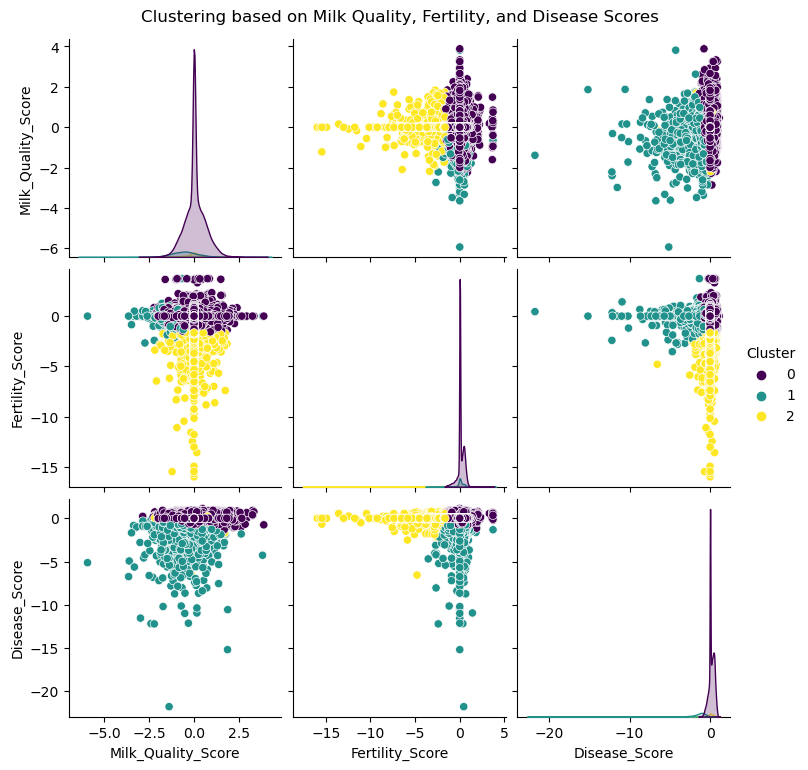

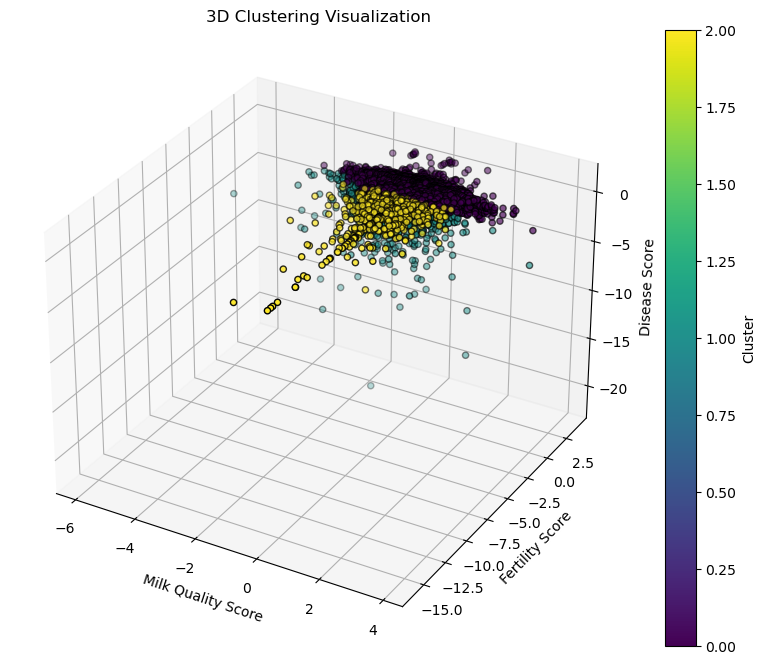

In [13]:
df_imputed = df[['idAnimale','Milk_Quality_Score', 'Fertility_Score', 'Disease_Score']].fillna(df.mean())
display(df_imputed[df_imputed['idAnimale'] == -9223372036848126976])
df_clustering = df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score']]
display(df_clustering)

# # Step 1: Standardize the composite scores to ensure comparability # already done
# scaler = StandardScaler()
# normalized_scores = scaler.fit_transform(df_clustering)
# display(normalized_scores)

# display(df_clustering)
data_for_clustering = df_clustering.values
display(data_for_clustering)

# Step 2: Perform K-means clustering with k=3 (adjust k as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Step 3: Visualize clustering results
# Pairplot to show relationships between the three composite scores and clusters
sns.pairplot(df_clustering, hue='Cluster', palette='viridis')
plt.suptitle("Clustering based on Milk Quality, Fertility, and Disease Scores", y=1.02)
plt.show()

# Optional: 3D plot to visualize clusters in three dimensions
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_clustering['Milk_Quality_Score'], 
                df_clustering['Fertility_Score'], 
                df_clustering['Disease_Score'], 
                c=df_clustering['Cluster'], cmap='viridis', edgecolor='k')

ax.set_xlabel('Milk Quality Score')
ax.set_ylabel('Fertility Score')
ax.set_zlabel('Disease Score')
plt.title("3D Clustering Visualization")
plt.colorbar(sc, label='Cluster')
plt.show()

                 idAnimale  Milk_Quality_Score  Fertility_Score  Disease_Score
12216 -9223372036848126976           -0.870064         0.396561       0.191403


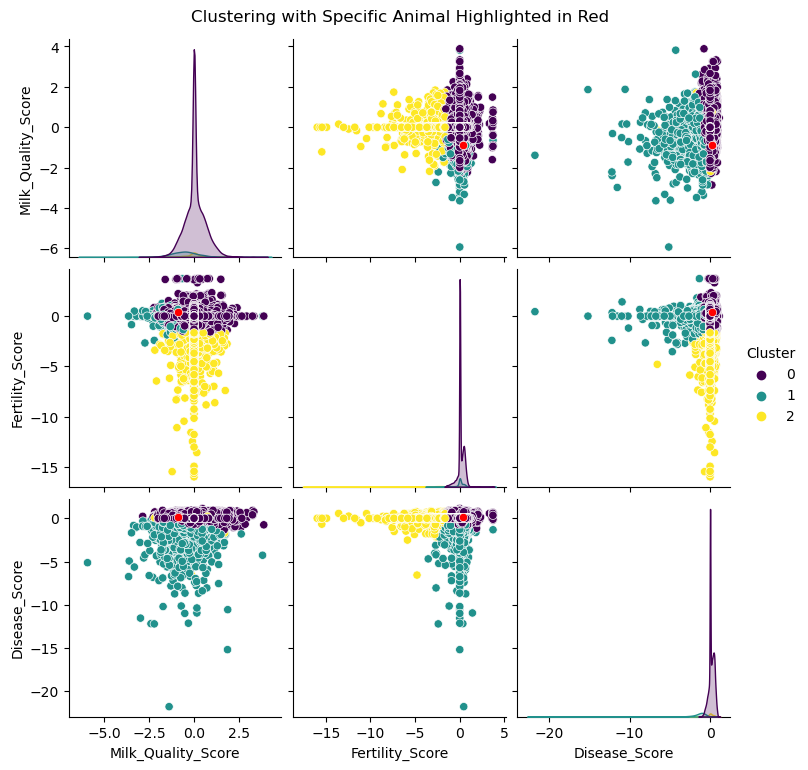

In [14]:
# Find the row for the specific animal ID
highlight_animal = df_imputed[df_imputed['idAnimale'] == -9223372036848126976]
print(highlight_animal)

# Create the base pair plot
pairplot = sns.pairplot(df_clustering, vars=['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score'], 
                        hue='Cluster', palette='viridis')

# Overlay the red dot for the specific animal in the off-diagonal subplots
# Adjust overlay to match base plot appearance
for ax in pairplot.axes.flatten():
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    
    if x_var and y_var and x_var != y_var:
        sns.scatterplot(data=highlight_animal, 
                        x=x_var, 
                        y=y_var, 
                        color='red', 
                        marker='o', 
                        ax=ax,
                       legend=False)


plt.suptitle("Clustering with Specific Animal Highlighted in Red", y=1.02)
plt.show()


In [15]:
# Keep only the three relevant composite scores
df_clustering = df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score']]

# Step 1: Standardize the composite scores to ensure comparability
scaler = StandardScaler()
normalized_scores = scaler.fit_transform(df_clustering)

# Step 2: Perform K-means clustering with k=3 (adjust k as needed)
kmeans = KMeans(n_clusters=2, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(normalized_scores)

# Step 3: Create an interactive 3D scatter plot with Plotly, setting marker size
fig = px.scatter_3d(df_clustering, 
                    x='Milk_Quality_Score', 
                    y='Fertility_Score', 
                    z='Disease_Score', 
                    color='Cluster',
                    title="Interactive 3D Clustering Visualization",
                    labels={'Milk_Quality_Score': 'Milk Quality Score',
                            'Fertility_Score': 'Fertility Score',
                            'Disease_Score': 'Disease Score'})

# Update marker size to make dots smaller
fig.update_traces(marker=dict(size=3))  # Adjust size as needed

# Show the plot
fig.show()


/Users/jiong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/jiong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



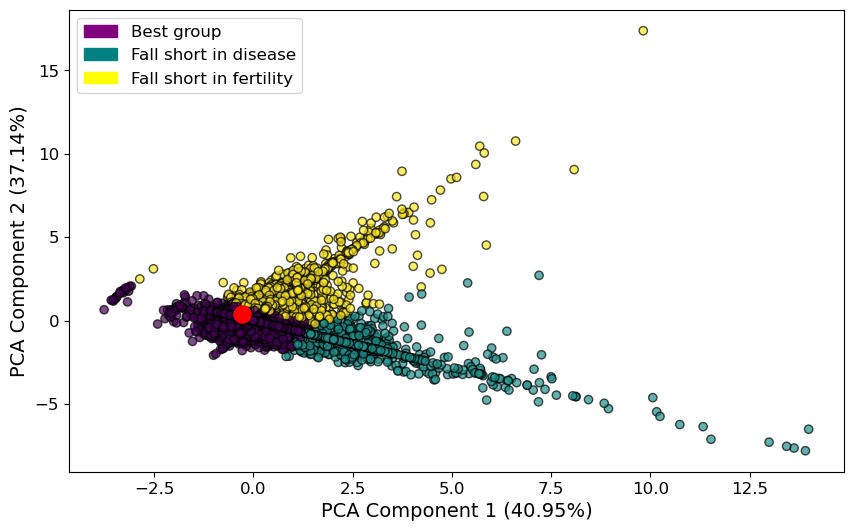

In [16]:

# Step 1: Use PCA to reduce to two dimensions
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score']])

# Get the percentage of variance explained by each PCA component
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

# Perform K-means clustering with k=3 (or another value if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df_imputed['Cluster'] = kmeans.fit_predict(pca_scores)

# Create a DataFrame for PCA components for easier plotting
df_pca = pd.DataFrame(pca_scores, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = df_imputed['Cluster']
df_pca['idAnimale'] = df_imputed['idAnimale']  # Add id column to locate the specific animal

# Identify the specific animal
highlight_animal = df_pca[df_pca['idAnimale'] == -9223372036848126976]

# Step 2: Plot the PCA components with clustering colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA Component 1'], df_pca['PCA Component 2'], 
                      c=df_pca['Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)

# Highlight the specific animal
plt.scatter(highlight_animal['PCA Component 1'], highlight_animal['PCA Component 2'], 
            color='red', s=150, marker='o', label='Animal -9223372036848126976')

# Add legend for clusters with custom patches
cluster_colors = ['purple', 'teal', 'yellow']  # Adjust colors to match your cmap
cluster_labels = ['Best group', 'Fall short in disease', 'Fall short in fertility']
handles = [mpatches.Patch(color=cluster_colors[i], label=cluster_labels[i]) for i in range(3)]

plt.legend(handles=handles, loc='best', fontsize=12)  # Increase font size for legend

# Add labels with explained variance percentages
plt.xlabel(f"PCA Component 1 ({explained_variance[0]:.2f}%)", fontsize=14)  # Larger font for x-label
plt.ylabel(f"PCA Component 2 ({explained_variance[1]:.2f}%)", fontsize=14)  # Larger font for y-label
plt.xticks(fontsize=12)  # Increase font size for x-ticks
plt.yticks(fontsize=12)  # Increase font size for y-ticks
plt.savefig('PCA.png', dpi=300)
plt.show()


Loadings of each trait on PCA components:
                    PCA Component 1  PCA Component 2
Milk_Quality_Score        -0.180766        -0.424734
Fertility_Score           -0.870608         0.488712
Disease_Score             -0.457564        -0.762078


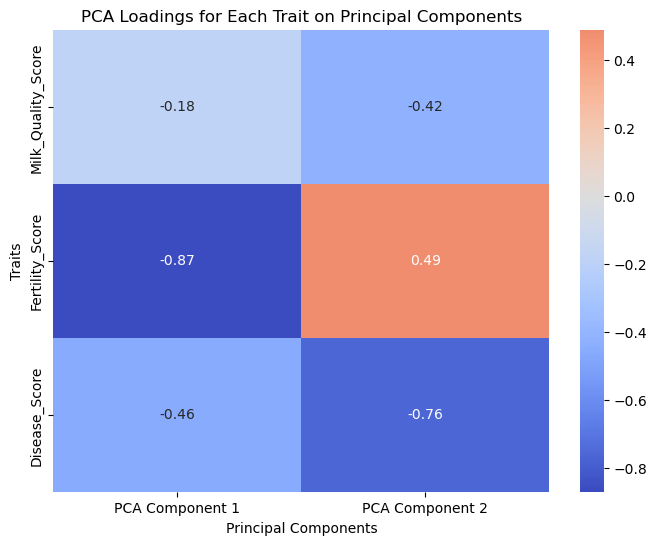

In [17]:
# Assuming df_imputed is the dataframe with the composite scores calculated
composite_scores = df_imputed[['Milk_Quality_Score', 'Fertility_Score', 'Disease_Score']]

# Perform PCA to get the components
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(composite_scores)

# Get the loadings for each component
loadings = pd.DataFrame(pca.components_.T, index=composite_scores.columns, columns=['PCA Component 1', 'PCA Component 2'])

# Display the loadings to understand what each component represents
print("Loadings of each trait on PCA components:")
print(loadings)

# Plot the loadings for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Loadings for Each Trait on Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Traits")
plt.savefig('PCA_composition.png', dpi=300)
plt.show()